In [1]:
import backtrader as bt
import datetime
import yfinance as yf
%matplotlib inline

In [2]:
#Initialize cerebro engine
cerebro = bt.Cerebro()

In [3]:
#Get EOD date from Yahoo Finance
df = yf.download('AAPL', start='2002-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,0.393750,0.416071,0.392143,0.416071,0.355748,529496800
2002-01-03,0.410714,0.424107,0.406607,0.421071,0.360023,612007200
2002-01-04,0.416786,0.427679,0.410536,0.423036,0.361703,409976000
2002-01-07,0.423571,0.428571,0.406250,0.408929,0.349642,444584000
2002-01-08,0.406250,0.411607,0.401071,0.403750,0.345214,450038400
...,...,...,...,...,...,...
2022-07-13,142.990005,146.449997,142.119995,145.490005,145.490005,71185600
2022-07-14,144.080002,148.949997,143.250000,148.470001,148.470001,78140700
2022-07-15,149.779999,150.860001,148.199997,150.169998,150.169998,76030800


In [5]:
#Add data feed to cerebro
feed = bt.feeds.PandasData(dataname=df)
cerebro.adddata(feed)

In [6]:
# Set our desired cash start
cerebro.broker.setcash(10000.0)

In [7]:
# # Set the commission
# cerebro.broker.setcommission(commission=0.001)

In [8]:
# #Define and add a Simple Moveing Avergae Cross strategy
# class SmaCross(bt.Strategy):
#     # list of parameters which are configurable for the strategy
#     params = dict(
#         pfast=50,  # period for the fast moving average
#         pslow=100   # period for the slow moving average
#     )

#     def __init__(self):
#         sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
#         sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
#         self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

#     def next(self):
#         if not self.position:  # not in the market
#             if self.crossover > 0:  # if fast crosses slow to the upside
#                 self.buy()  # enter long

#         elif self.crossover < 0:  # in the market & cross to the downside
#             self.close()  # close long position
            
# cerebro.addstrategy(SmaCross)

In [9]:
# #add sizer 50% of the whole portoflio
# cerebro.addsizer(bt.sizers.PercentSizer, percents=50)

In [10]:
# #add annual return analyzer
# cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')

In [11]:
#Kick off the run
strategy_res = cerebro.run()

<IPython.core.display.Javascript object>


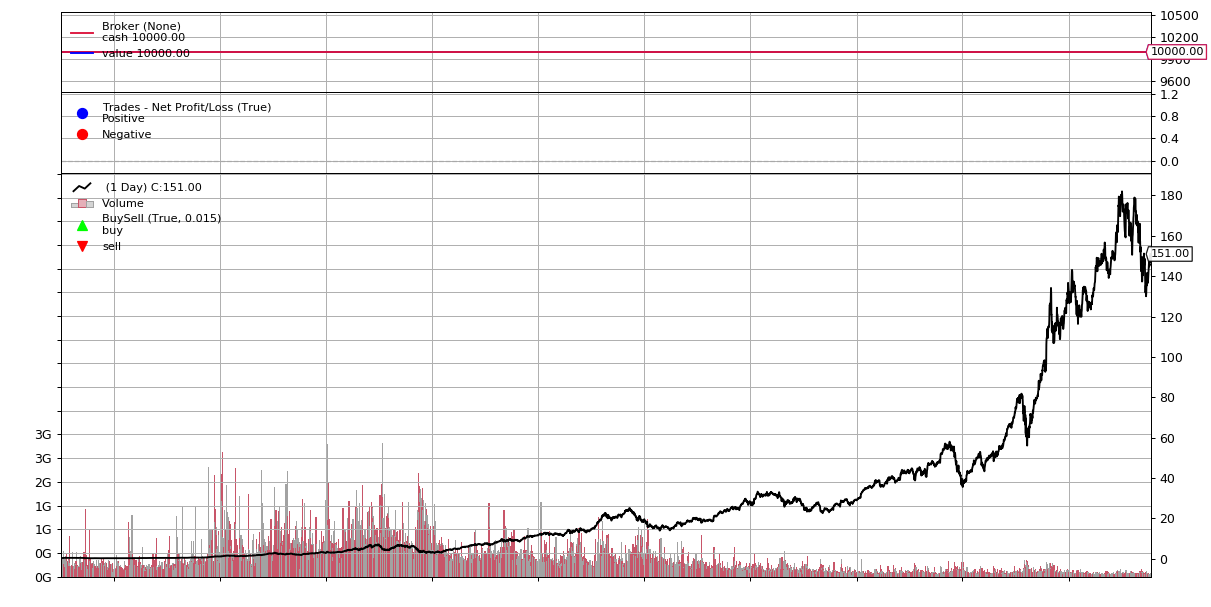

[[<Figure size 432x288 with 4 Axes>]]

In [12]:
#Plot out the back testing results
cerebro.plot()

In [13]:
# #Show annual return
# strategy_res[0].analyzers.annual_return.get_analysis()